In [ ]:
from ultralytics import YOLO
import torch

: 

In [ ]:



model = YOLO('yolo11m.pt')  

results = model.train(
    data='YOLO_COCO/data.yaml',
    epochs=100,
    imgsz=640,
    batch=5,
    name='yolo11m_100epochs',
    device=0,  #gpu
    val=True,  
    save=True,
    plots=True,
    show=True,
    patience = 10
)




New https://pypi.org/project/ultralytics/8.4.5 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.253  Python-3.10.19 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4070, 12282MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=5, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=YOLO_COCO/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolo11m_100epochs, nbs=64, nms=False,

In [4]:
metrics = model.val(data='YOLO_COCO/data.yaml', split='test')
print(metrics)

Ultralytics 8.3.253  Python-3.10.19 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4070, 12282MiB)
val: Fast image access  (ping: 0.10.0 ms, read: 1629.0556.2 MB/s, size: 1796.4 KB)
val: Scanning C:\Users\user\Desktop\AdvancedCV\YOLO_COCO\labels\test.cache... 122 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 122/122  0.0s
val: C:\Users\user\Desktop\AdvancedCV\YOLO_COCO\images\test\1989d2bf-front.jpg: corrupt JPEG restored and saved
val: C:\Users\user\Desktop\AdvancedCV\YOLO_COCO\images\test\313f61a3-front.jpg: corrupt JPEG restored and saved
val: C:\Users\user\Desktop\AdvancedCV\YOLO_COCO\images\test\32be709f-side.jpg: corrupt JPEG restored and saved
val: C:\Users\user\Desktop\AdvancedCV\YOLO_COCO\images\test\3ec82dec-back.jpg: corrupt JPEG restored and saved
val: C:\Users\user\Desktop\AdvancedCV\YOLO_COCO\images\test\4802289d-side.jpg: corrupt JPEG restored and saved
val: C:\Users\user\Desktop\AdvancedCV\YOLO_COCO\images\test\646a4174-side.jpg: corrupt JPEG restored and saved
val:

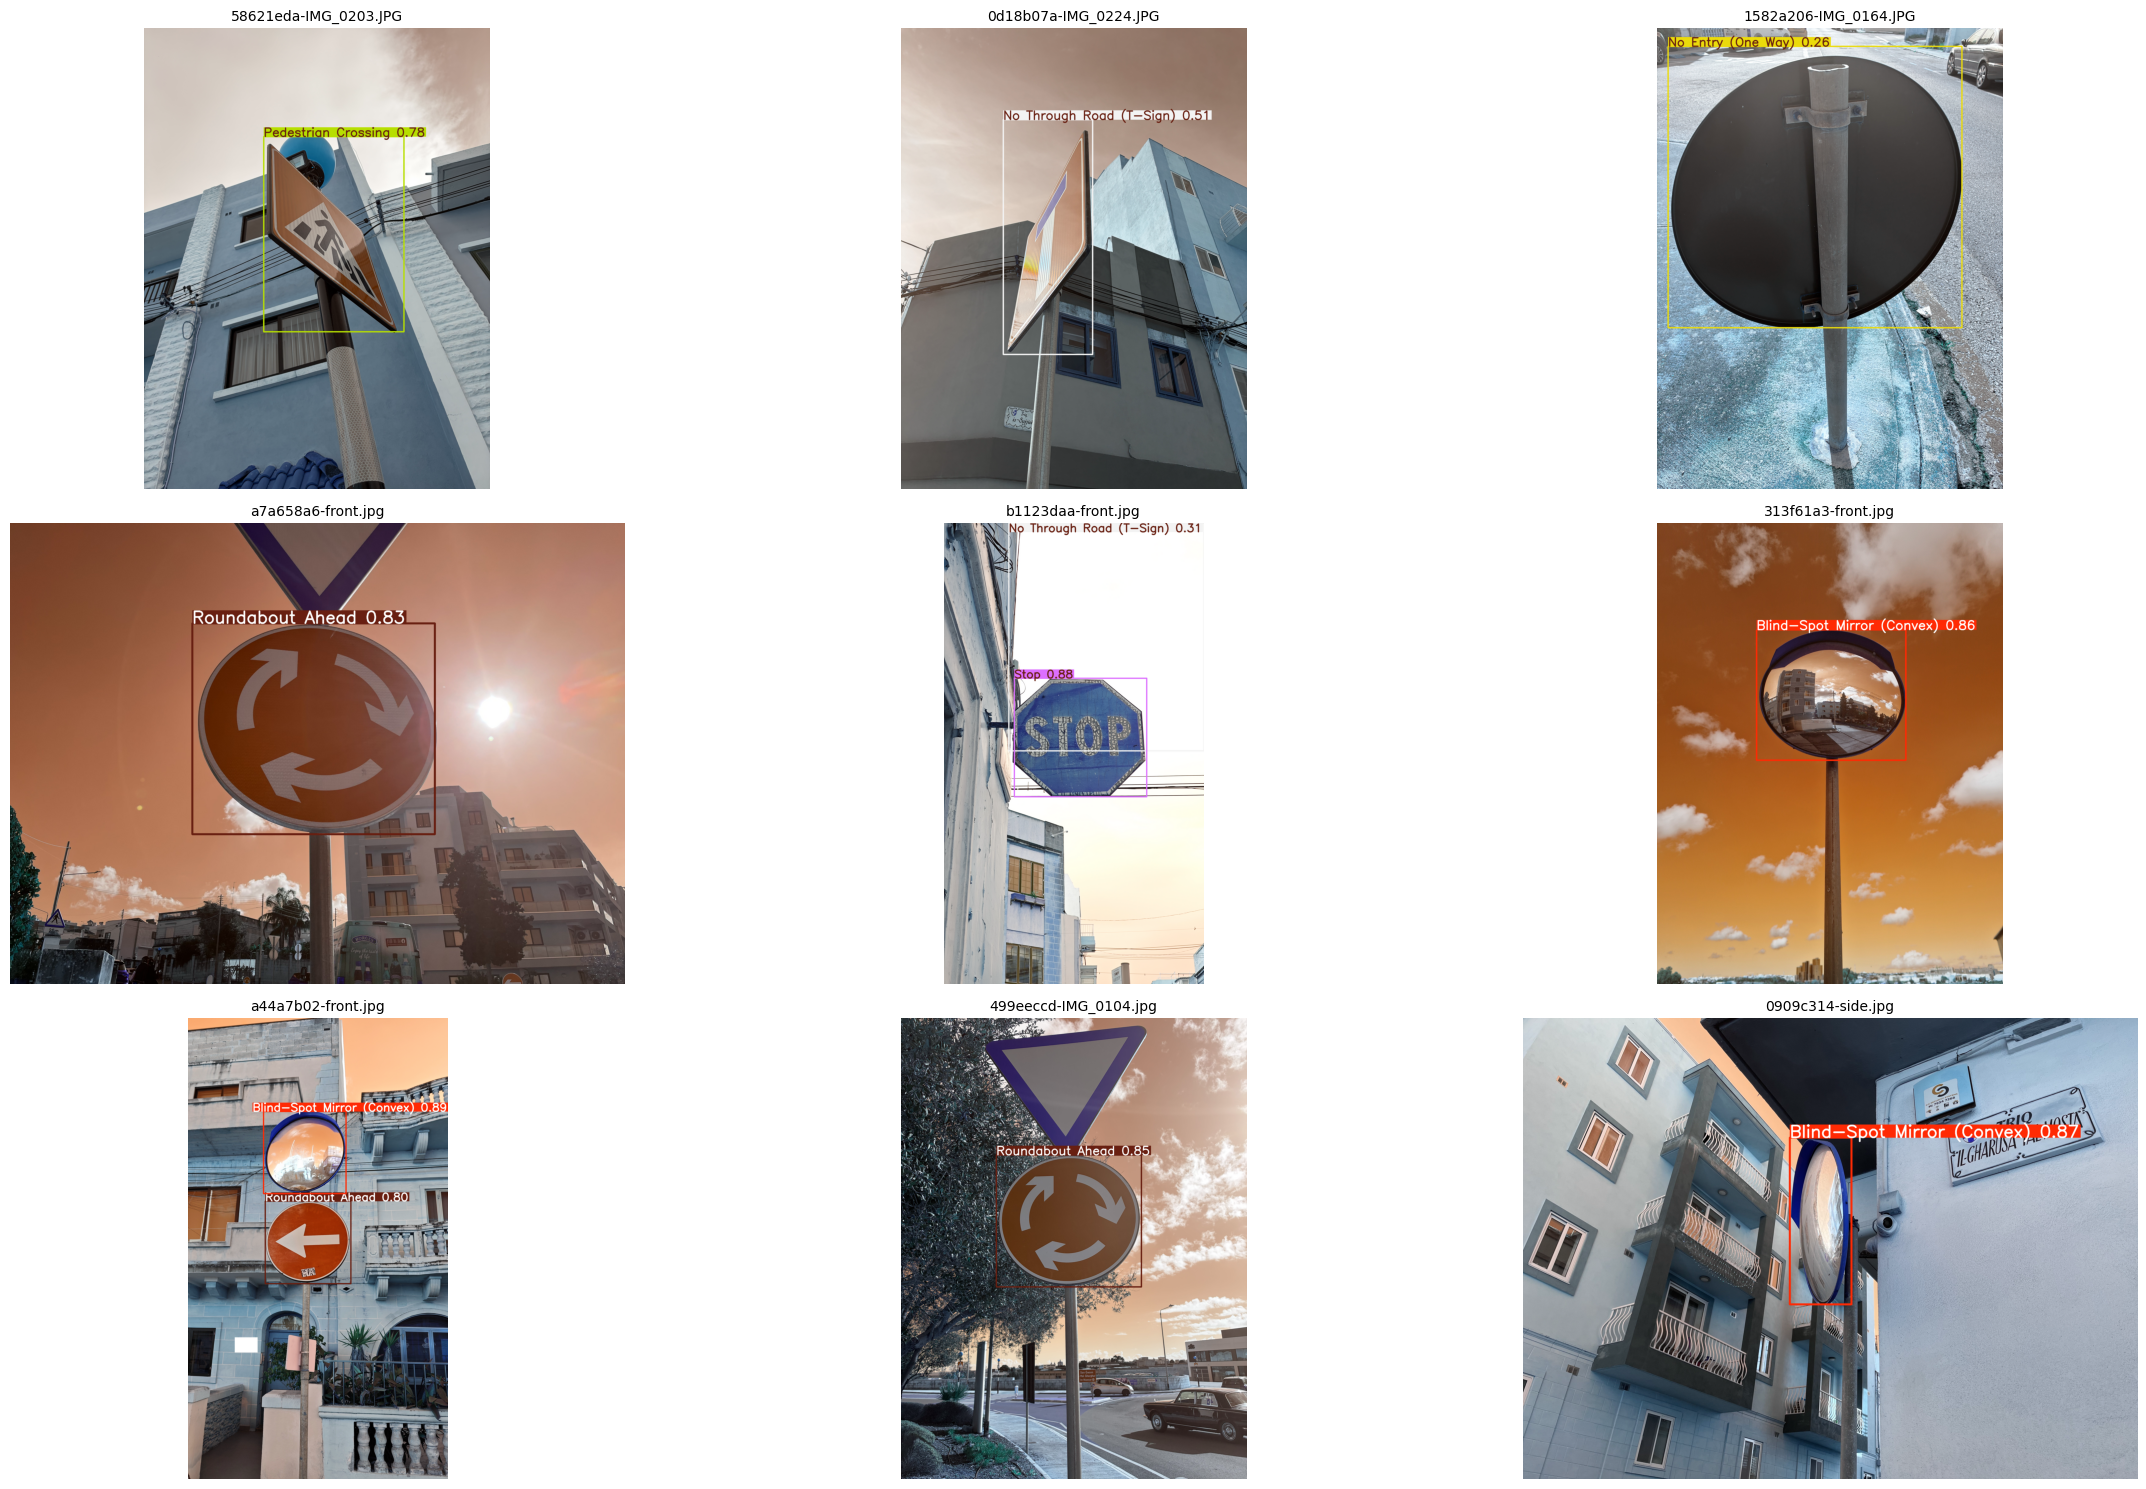

In [ ]:

weights = YOLO('runs/detect/yolo11m_100epochs/weights/best.pt')
data='YOLO_COCO/data.yaml'


import matplotlib.pyplot as plt
import random
from pathlib import Path

test_images = list(Path('YOLO_COCO/images/test').glob('*.jpg'))



fig, axes = plt.subplots(3, 3, figsize=(25, 15))
axes = axes.flatten()

idx = 0
#predict and display each image
for img_path in random.sample(test_images, min(9, len(test_images))):
    if idx >= 9:
        break

    results = model.predict(img_path, verbose=False)[0]
    if results.boxes is None or len(results.boxes) == 0:
        continue
    
    #get annotated image
    annotated = results.plot()  
    axes[idx].imshow(annotated)
    axes[idx].set_title(img_path.name, fontsize=10)
    axes[idx].axis('off')
    idx += 1

for idx in range(idx, 9):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()


In [11]:
print(f"mAP@50-95: {metrics.box.map}")

mAP@50-95: 0.6234518616691804


In [ ]:
from ultralytics import YOLO



#validate on validation set
metrics = model.val(data='YOLO_COCO/data.yaml')

#access metrics
print(f"mAP50-95: {metrics.box.map}")    
print(f"mAP50: {metrics.box.map50}")      
print(f"mAP75: {metrics.box.map75}")      
print(f"Precision: {metrics.box.mp}")    
print(f"Recall: {metrics.box.mr}")   

Ultralytics 8.3.253  Python-3.10.19 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4070, 12282MiB)
val: Fast image access  (ping: 0.10.0 ms, read: 1645.1327.6 MB/s, size: 2332.5 KB)
val: Scanning C:\Users\user\Desktop\AdvancedCV\YOLO_COCO\labels\val.cache... 93 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 93/93  0.0s
val: C:\Users\user\Desktop\AdvancedCV\YOLO_COCO\images\val\0cc3921b-side.jpg: corrupt JPEG restored and saved
val: C:\Users\user\Desktop\AdvancedCV\YOLO_COCO\images\val\22bd24da-back.jpg: corrupt JPEG restored and saved
val: C:\Users\user\Desktop\AdvancedCV\YOLO_COCO\images\val\5350b978-side.jpg: corrupt JPEG restored and saved
val: C:\Users\user\Desktop\AdvancedCV\YOLO_COCO\images\val\6ceb2635-front.jpg: corrupt JPEG restored and saved
val: C:\Users\user\Desktop\AdvancedCV\YOLO_COCO\images\val\6fffeddb-side.jpg: corrupt JPEG restored and saved
val: C:\Users\user\Desktop\AdvancedCV\YOLO_COCO\images\val\8e544be4-side.jpg: corrupt JPEG restored and saved
val: C:\Users\u

In [12]:
print(metrics)

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000023A61271DE0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
 

    epoch      time  train/box_loss  train/cls_loss  train/dfl_loss  \
0       1   25.3633         0.90572         2.76275         1.23220   
1       2   41.3237         1.00064         1.82294         1.35972   
2       3   56.6226         1.00229         1.66971         1.35855   
3       4   72.1190         0.97872         1.39474         1.32314   
4       5   87.1414         1.06380         1.34091         1.40271   
5       6  101.8260         1.01646         1.29521         1.34436   
6       7  116.7950         0.96302         1.17888         1.33360   
7       8  132.0320         0.93000         1.13583         1.32065   
8       9  148.0940         0.91416         1.08276         1.27575   
9      10  164.1650         0.87270         1.01422         1.26488   
10     11  203.9560         0.84883         0.96629         1.32168   
11     12  219.1730         0.82550         0.90120         1.29437   
12     13  234.2080         0.78924         0.85067         1.28337   
13    

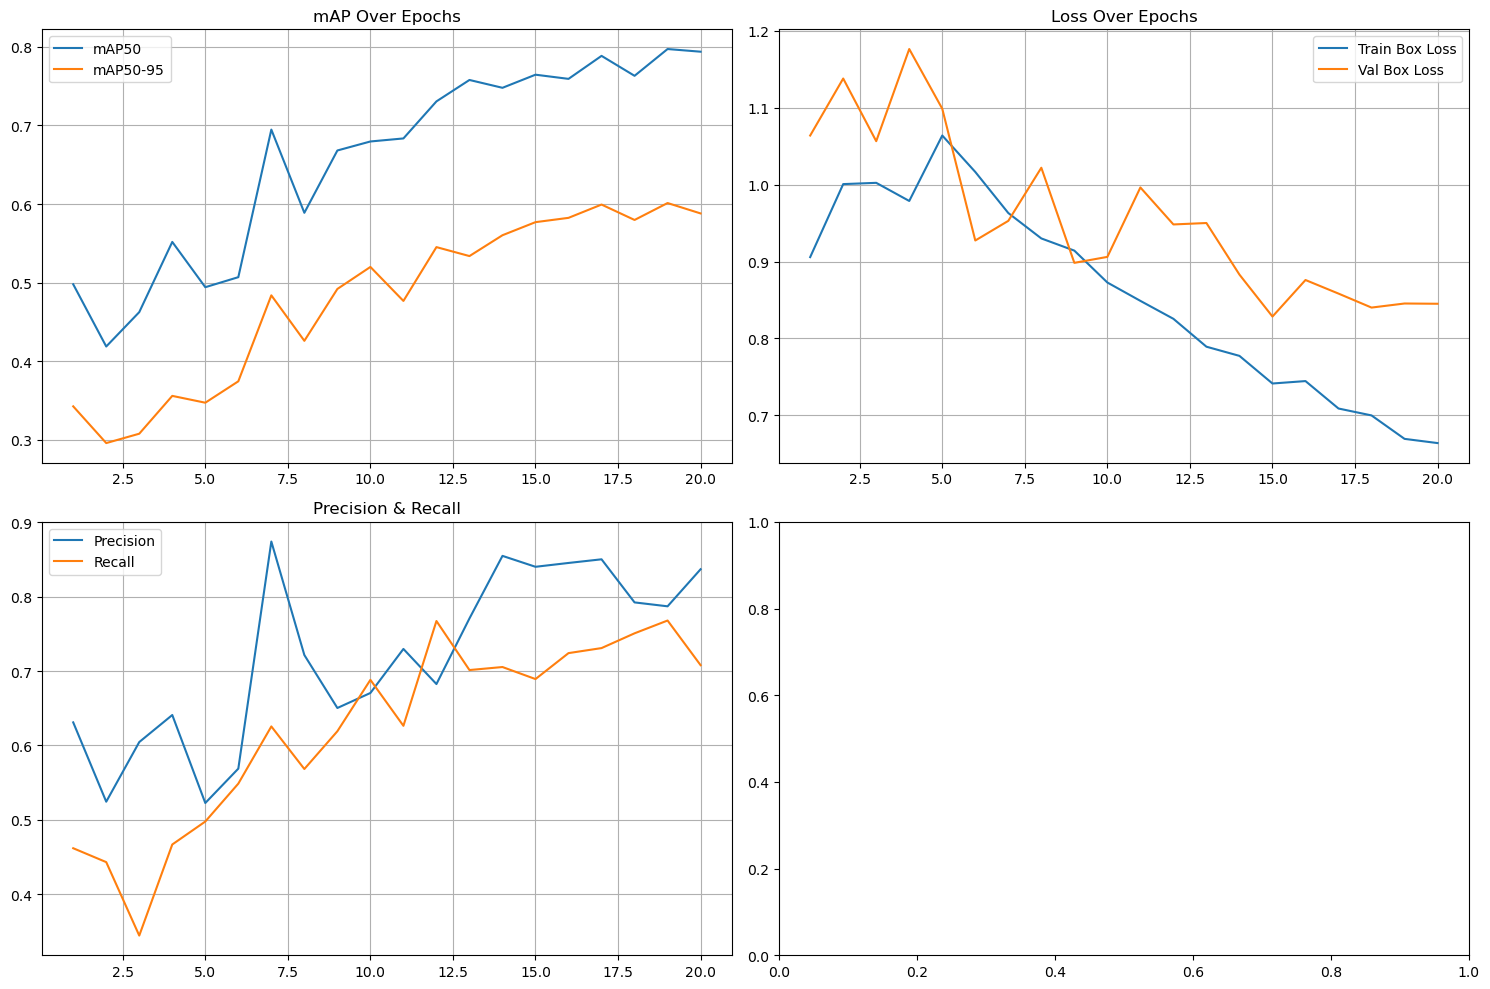

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#load training results
results_df = pd.read_csv('runs/detect/yolo11_custom2/results.csv')


print(results_df)

#plot metrics
fig, axes = plt.subplots(2, 2, figsize=(15, 10))


axes[0, 0].plot(results_df['epoch'], results_df['metrics/mAP50(B)'], label='mAP50')
axes[0, 0].plot(results_df['epoch'], results_df['metrics/mAP50-95(B)'], label='mAP50-95')
axes[0, 0].set_title('mAP Over Epochs')
axes[0, 0].legend()
axes[0, 0].grid(True)

axes[0, 1].plot(results_df['epoch'], results_df['train/box_loss'], label='Train Box Loss')
axes[0, 1].plot(results_df['epoch'], results_df['val/box_loss'], label='Val Box Loss')
axes[0, 1].set_title('Loss Over Epochs')
axes[0, 1].legend()
axes[0, 1].grid(True)

axes[1, 0].plot(results_df['epoch'], results_df['metrics/precision(B)'], label='Precision')
axes[1, 0].plot(results_df['epoch'], results_df['metrics/recall(B)'], label='Recall')
axes[1, 0].set_title('Precision & Recall')
axes[1, 0].legend()
axes[1, 0].grid(True)


plt.tight_layout()
plt.show()
